In [4]:
from src.utils import *

# Gerando probes

In [5]:
c0 = 349.5369
f = 10
lamb = c0/f
ppw = lamb/200

probes(number_of_probes=int(200/ppw), lim = (-100,100), name_of_archive='probes_200ppw')
print(f'lambda = {lamb} [m]')
print(f'ppw = {200/ppw}')

lambda = 34.95369 [m]
ppw = 1144.3713095813346


# Análise das Malhas
- Time Schemes
- Spacial Schemes

### CircMesh


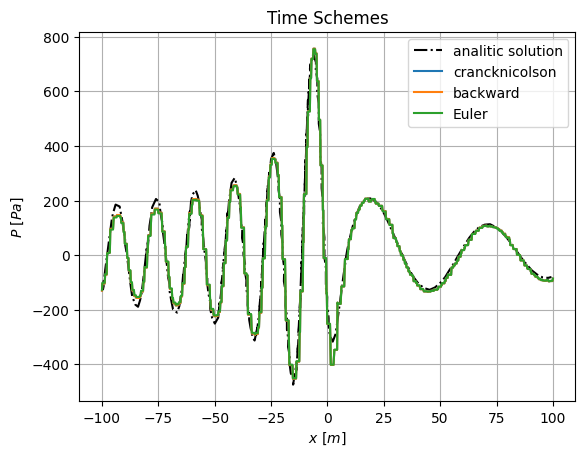

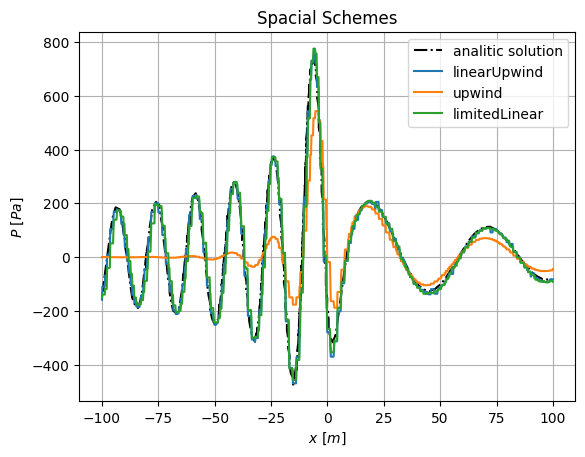

In [7]:
sol = PATH_DATA.joinpath('monopoleFlow', 'analiticSolution2s.dat')
psimT = importData(case='circMesh', test='timeTest')
psimS = importData(case = 'circMesh', test='spacialTest')


plotSchemes(psimT, analitc=sol, title='CircMesh - Time Schemes', save=True)
plotSchemes(psimS, analitc=sol, title='CircMesh - Spacial Schemes', save=True)

### newMesh0

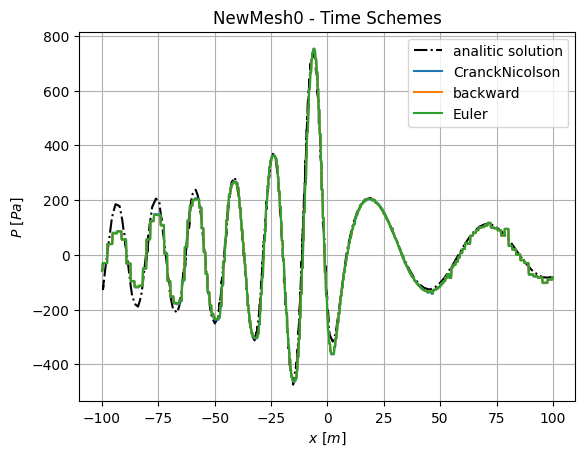

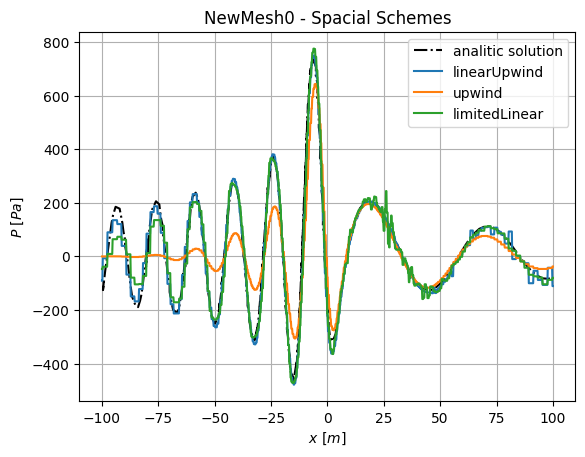

In [8]:
sol = PATH_DATA.joinpath('monopoleFlow', 'analiticSolution2s.dat')
psimT = importData(case='newMesh0', test='timeTest')
psimS = importData(case = 'newMesh0', test='spacialTest')


plotSchemes(psimT, analitc=sol, title='NewMesh0 - Time Schemes', save=True)
plotSchemes(psimS, analitc=sol, title='NewMesh0 - Spacial Schemes', save=True)

### quadMesh

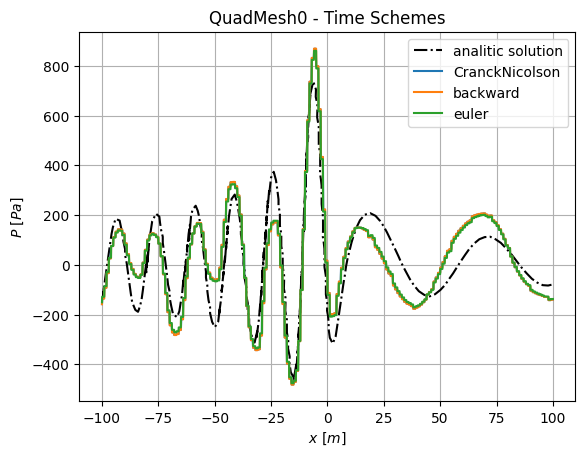

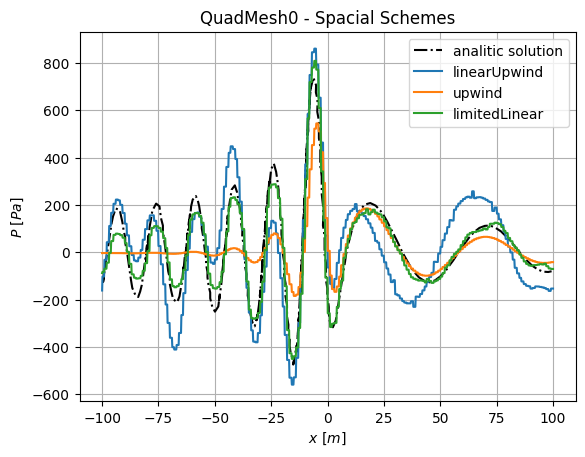

In [9]:
sol = PATH_DATA.joinpath('monopoleFlow', 'analiticSolution2s.dat')
psimT = importData(case='quadMesh', test='timeTest')
psimS = importData(case = 'quadMesh', test='spacialTest')


plotSchemes(psimT, analitc=sol, title='QuadMesh - Time Schemes', save=True)
plotSchemes(psimS, analitc=sol, title='QuadMesh - Spacial Schemes', save=True)